In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
link=r'http://localhost:8889/edit/Downloads/medical_examination.csv'

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
print(df.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.age.describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# height from cm to meters
df["height"] = 0.01 * df["height"]

### Tasks

#### 1. Add an overweight column to the data.

In [11]:
df = df.assign(overweight =  (df.weight) / (2 ** df.height))

#### best way to tackle if conditions for series and dataframes

In [12]:
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

In [13]:
df['overweight'] = df['overweight'].astype('int64')

In [14]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,2,2,0,0,0,0,0
6,9,22113,1,1.57,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,1,1,0,0,1,0,0
9,14,19834,1,1.64,68.0,110,60,1,1,0,0,0,0,0


#### 2. Normalize the data by making 0 always good and 1 always bad. 
#### If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [15]:
df.loc[df['cholesterol'] <= 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] <= 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [16]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,1,1,0,0,0,0,0
6,9,22113,1,1.57,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,0,0,0,0,1,0,0
9,14,19834,1,1.64,68.0,110,60,0,0,0,0,0,0,0


#### Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [17]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'overweight'],
      dtype='object')

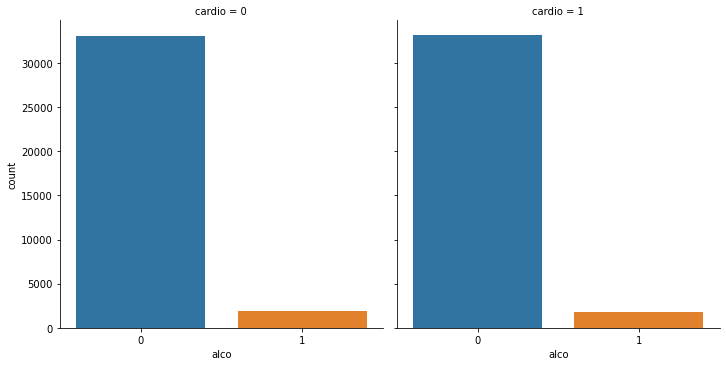

In [18]:
sns.catplot(data=df,
           x='alco',
           kind='count',
           col='cardio')

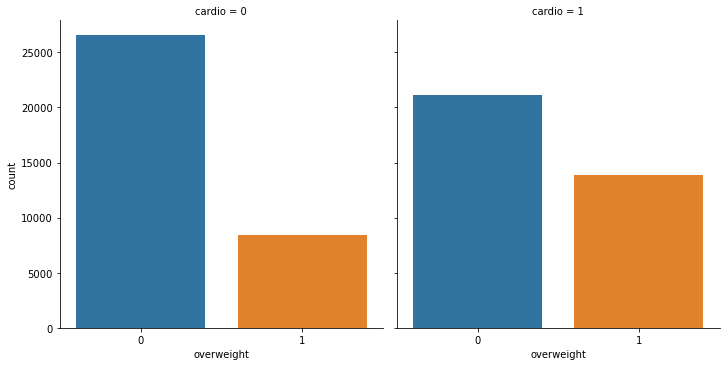

In [19]:
sns.catplot(data = df, 
            x = 'overweight', 
            kind = 'count', 
            col = 'cardio')

In [20]:
 df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=[
            'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [21]:
df_final = df_cat.groupby(['cardio', 'variable','value'])[['value']].count().rename({'value': 'total'},axis=1).reset_index()

df_final

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,26575
9,0,overweight,1,8446


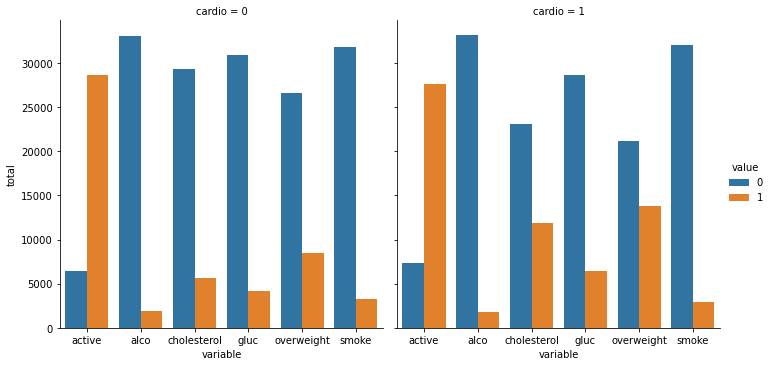

In [22]:
sns.catplot(data=df_final,
           x='variable',
           y='total',
           kind='bar',
           hue='value',
           col='cardio')

        cholesterol variable  value
0                 0   active      1
1                 1   active      1
2                 1   active      0
3                 0   active      1
4                 0   active      0
...             ...      ...    ...
209995            0   cardio      0
209996            1   cardio      1
209997            1   cardio      1
209998            0   cardio      1
209999            1   cardio      0

[210000 rows x 3 columns]
    cholesterol variable  value  total
0             0   active      0  10353
1             0   active      1  42032
2             0     alco      0  49867
3             0     alco      1   2518
4             0   cardio      0  29330
5             0   cardio      1  23055
6             1   active      0   3386
7             1   active      1  14229
8             1     alco      0  16369
9             1     alco      1   1246
10            1   cardio      0   5691
11            1   cardio      1  11924


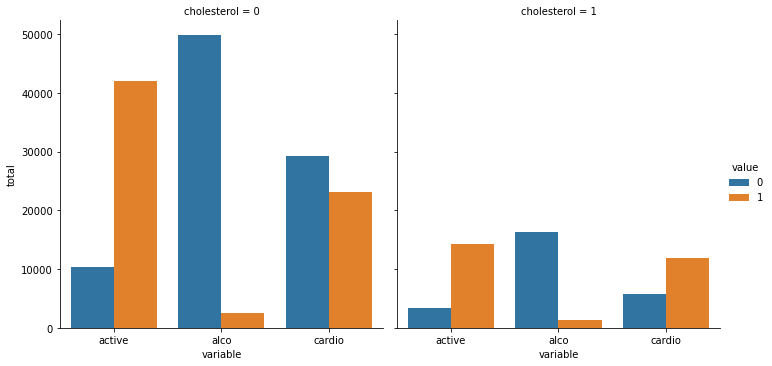

In [23]:
 df_cho = pd.melt(
        df,
        id_vars=['cholesterol'],
        value_vars=[
            'active', 'alco', 'cardio'])
print(df_cho)

df_cho_f = df_cho.groupby(['cholesterol', 'variable','value'])[['value']].count().rename({'value': 'total'},axis=1).reset_index()

print(df_cho_f)

sns.catplot(data=df_cho_f,
           x='variable',
           y='total',
           kind='bar',
           hue='value',
           col='cholesterol')

#### 3. Convert the data into long format and 
#### create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
#### The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
#### The chart should look like examples/Figure_1.png.

####  4. Clean the data. Filter out the following patient segments that represent incorrect data:

In [24]:
df.loc[df['ap_hi'] < df['ap_lo'], 'ap_lo'] = df['ap_lo']/10
df['ap_lo'] = df['ap_lo'].astype('int64')

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [26]:
df['height'].quantile(0.025)

1.5

In [27]:
df['height'].quantile(0.975)

1.8

In [28]:
df.loc[df['height'] < df['height'].quantile(0.025), 'height'] = 1.5

In [29]:
df.loc[df['height'] > df['height'].quantile(0.975), 'height'] = 1.8

In [30]:
df['height'].min()

1.5

In [31]:
df['height'].max()

1.8

In [32]:
df['weight'].quantile(0.025)

51.0

In [33]:
df['weight'].quantile(0.975)

108.0

In [34]:
df.loc[df['weight'] < df['weight'].quantile(0.025), 'weight'] = 51.0

In [35]:
df.loc[df['weight'] > df['weight'].quantile(0.975), 'weight'] = 108.0

In [36]:
df['weight'].min()

51.0

In [37]:
df['weight'].max()

108.0

In [38]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,1.51,67.0,120,80,1,1,0,0,0,0,0
6,9,22113,1,1.57,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,1.78,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,1.58,71.0,110,70,0,0,0,0,1,0,0
9,14,19834,1,1.64,68.0,110,60,0,0,0,0,0,0,0


#### 5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). 
#### Mask the upper triangle. The chart should look like examples/Figure_2.png.

#### .triu() is a method in NumPy that returns the lower triangle of any matrix given to it, 
#### while .tril() returns the upper triangle of any matrix given to it.

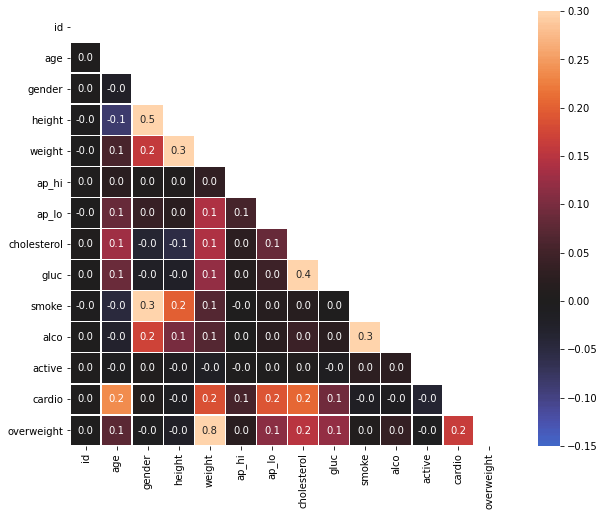

In [39]:
plt.figure(figsize = (12,8))
cr_mat = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask = cr_mat, center=0,
            linewidths=.5, square=True,
            vmin=-0.15, vmax=0.3, fmt='0.1f')
plt.show()